In [ ]:
#Hackathon

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from pprint import *

In [3]:
import seaborn as sns
sns.set()

In [4]:
train=pd.read_csv("Train_Dataset.csv")
test = pd.read_csv("Test_Dataset.csv")

In [5]:
train.shape

(18521, 22)

In [6]:
test.shape

(8332, 21)

In [7]:
train.head()

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,FD
0,2008001,37.0,admin.,single,university.degree,no,no,no,cellular,may,...,2.0,999.0,1.0,failure,-1.8,92.893,-46.2,1.313,5099.1,0
1,2008002,50.0,admin.,married,basic.9y,no,no,no,cellular,aug,...,3.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
2,2008003,45.0,technician,divorced,professional.course,no,no,no,cellular,aug,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,0
3,2008004,27.0,technician,single,professional.course,no,no,no,cellular,apr,...,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.415,5099.1,0
4,2008005,22.0,technician,single,professional.course,no,yes,no,cellular,nov,...,1.0,999.0,0.0,nonexistent,-3.4,92.649,-30.1,0.720,5017.5,1


In [8]:
test.head()

,ID,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,549001,40.0,admin.,married,university.degree,unknown,yes,yes,cellular,nov,...,205,2,999.0,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
1,549002,41.0,blue-collar,divorced,unknown,no,yes,no,telephone,jul,...,351,11,999.0,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1
2,549003,34.0,admin.,married,basic.9y,no,yes,no,cellular,apr,...,401,2,999.0,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1
3,549004,32.0,technician,single,high.school,no,no,no,cellular,aug,...,64,1,999.0,0,nonexistent,1.4,93.444,-36.1,4.964,5100.1
4,549005,45.0,management,married,university.degree,no,no,no,cellular,nov,...,633,2,999.0,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8


In [9]:
train.education.value_counts()

university.degree      6257
high.school            4203
professional.course    2460
basic.9y               2354
basic.4y               1617
basic.6y                878
unknown                 720
illiterate                8
?                         3
Name: education, dtype: int64

In [10]:
train.loan.value_counts()

no         15167
yes         2905
unknown      411
0              1
Name: loan, dtype: int64

In [11]:
train.job.value_counts()

admin.           5104
blue-collar      3451
technician       3256
services         1655
management       1377
retired           923
self-employed     650
entrepreneur      617
student           477
unemployed        444
housemaid         435
unknown           128
Name: job, dtype: int64

In [1206]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18521 entries, 0 to 18520
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              18521 non-null  int64  
 1   age             18515 non-null  float64
 2   job             18517 non-null  object 
 3   marital         18507 non-null  object 
 4   education       18500 non-null  object 
 5   default         18509 non-null  object 
 6   housing         18498 non-null  object 
 7   loan            18484 non-null  object 
 8   contact         18460 non-null  object 
 9   month           18490 non-null  object 
 10  day_of_week     18490 non-null  object 
 11  duration        18500 non-null  float64
 12  campaign        18506 non-null  float64
 13  pdays           18489 non-null  float64
 14  previous        18506 non-null  float64
 15  poutcome        18482 non-null  object 
 16  emp.var.rate    18512 non-null  object 
 17  cons.price.idx  18513 non-null 

In [1207]:
train.apply(lambda x: sum(x.isnull()))

ID                 0
age                6
job                4
marital           14
education         21
default           12
housing           23
loan              37
contact           61
month             31
day_of_week       31
duration          21
campaign          15
pdays             32
previous          15
poutcome          39
emp.var.rate       9
cons.price.idx     8
cons.conf.idx      9
euribor3m          9
nr.employed        2
FD                 0
dtype: int64

In [1208]:
test.apply(lambda x: sum(x.isnull()))

ID                 0
age               11
job               44
marital            0
education          8
default            8
housing            8
loan               1
contact            8
month              0
day_of_week       29
duration           0
campaign           0
pdays              2
previous           0
poutcome           1
emp.var.rate      23
cons.price.idx    90
cons.conf.idx      2
euribor3m          2
nr.employed        1
dtype: int64

In [1209]:
from scipy.stats import mode

In [1210]:
#job

In [1211]:
mode(train.job)[0][0]

'admin.'

In [1212]:
job_Null_Indices = train[train.job.isnull()].index
for el in job_Null_Indices: train.job[el] = 'admin.'

<ipython-input-1212-8780ea76e336>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in job_Null_Indices: train.job[el] = 'admin.'


In [1213]:
mode(test.job)[0][0]

'admin.'

In [1214]:
job_Null_Indices_test = test[test.job.isnull()].index
for el in job_Null_Indices_test: test.job[el] = 'admin.'

<ipython-input-1214-58ff45f0a7d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in job_Null_Indices_test: test.job[el] = 'admin.'


In [1215]:
#'marital'

In [1216]:
mode(train.marital)[0][0]

'married'

In [1217]:
marital_Null_Indices = train[train.marital.isnull()].index
for el in marital_Null_Indices: train.marital[el] = 'married'

<ipython-input-1217-c616921f748a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in marital_Null_Indices: train.marital[el] = 'married'


In [1218]:
mode(test.marital)[0][0]

'married'

In [1219]:
marital_Null_Indices_test = test[test.marital.isnull()].index
for el in marital_Null_Indices_test: test.marital[el] = 'married'

In [1220]:
#education

In [1221]:
mode(train.education)[0][0]

'university.degree'

In [1222]:
edu_Null_Indices = train[train.education.isnull()].index
for el in edu_Null_Indices: train.education[el] = 'university.degree'

<ipython-input-1222-aadffdc1e1ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in edu_Null_Indices: train.education[el] = 'university.degree'


In [1223]:
mode(test.education)[0][0]

'university.degree'

In [1224]:
edu_Null_Indices_test = test[test.education.isnull()].index
for el in edu_Null_Indices_test: test.education[el] = 'university.degree'

<ipython-input-1224-86c1b60a2940>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in edu_Null_Indices_test: test.education[el] = 'university.degree'


In [1225]:
#default

In [1226]:
mode(train.default)[0][0]

'no'

In [1227]:
default_Null_Indices = train[train.default.isnull()].index
for el in default_Null_Indices: train.default[el] = 'no'

<ipython-input-1227-68ae01836009>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in default_Null_Indices: train.default[el] = 'no'


In [1228]:
mode(test.default)[0][0]

'no'

In [1229]:
default_Null_Indices_test = test[test.default.isnull()].index
for el in default_Null_Indices_test: test.default[el] = 'no'

<ipython-input-1229-4c2d8cba1256>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in default_Null_Indices_test: test.default[el] = 'no'


In [1230]:
#housing

In [1231]:
mode(train.housing)[0][0]

'yes'

In [1232]:
housing_Null_Indices = train[train.housing.isnull()].index
for el in housing_Null_Indices: train.housing[el] = 'yes'

<ipython-input-1232-994c0dc8e37a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in housing_Null_Indices: train.housing[el] = 'yes'


In [1233]:
mode(test.housing)[0][0]

'yes'

In [1234]:
housing_Null_Indices_test = test[test.housing.isnull()].index
for el in housing_Null_Indices_test: test.housing[el] = 'yes'

<ipython-input-1234-127a179f5f2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in housing_Null_Indices_test: test.housing[el] = 'yes'


In [1235]:
#loan

In [1236]:
mode(train.loan)[0][0]

'no'

In [1237]:
loan_Null_Indices = train[train.loan.isnull()].index
for el in loan_Null_Indices: train.loan[el] = 'no'

<ipython-input-1237-53d034120321>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in loan_Null_Indices: train.loan[el] = 'no'


In [1238]:
mode(test.loan)[0][0]

'no'

In [1239]:
loan_Null_Indices_test = test[test.loan.isnull()].index
for el in loan_Null_Indices_test: test.loan[el] = 'no'

<ipython-input-1239-5f3fa2ba5b56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in loan_Null_Indices_test: test.loan[el] = 'no'


In [1240]:
#contact

In [1241]:
mode(train.contact)[0][0]

'cellular'

In [1242]:
contact_Null_Indices = train[train.contact.isnull()].index
for el in contact_Null_Indices: train.contact[el] = 'cellular'

<ipython-input-1242-485164bf939d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in contact_Null_Indices: train.contact[el] = 'cellular'


In [1243]:
mode(test.contact)[0][0]

'cellular'

In [1244]:
contact_Null_Indices_test = test[test.contact.isnull()].index
for el in contact_Null_Indices_test: test.contact[el] = 'cellular'

<ipython-input-1244-3842d8eea92c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in contact_Null_Indices_test: test.contact[el] = 'cellular'


In [1245]:
#month

In [1246]:
mode(train.month)[0][0]

'may'

In [1247]:
month_Null_Indices = train[train.month.isnull()].index
for el in month_Null_Indices: train.month[el] = 'may'

<ipython-input-1247-a263dd6dba85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in month_Null_Indices: train.month[el] = 'may'


In [1248]:
#day_of_week

In [1249]:
mode(train.day_of_week)[0][0]

'thu'

In [1250]:
dow_Null_Indices = train[train.day_of_week.isnull()].index
for el in dow_Null_Indices: train.day_of_week[el] = 'thu'

<ipython-input-1250-22402527b115>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in dow_Null_Indices: train.day_of_week[el] = 'thu'


In [1251]:
mode(test.day_of_week)[0][0]

'thu'

In [1252]:
dow_Null_Indices_test = test[test.day_of_week.isnull()].index
for el in dow_Null_Indices_test: test.day_of_week[el] = 'thu'

<ipython-input-1252-2d2c68dd7f0a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in dow_Null_Indices_test: test.day_of_week[el] = 'thu'


In [1253]:
#poutcome

In [1254]:
mode(train.poutcome)[0][0]

'nonexistent'

In [1255]:
pout_Null_Indices = train[train.poutcome.isnull()].index
for el in pout_Null_Indices: train.poutcome[el] = 'nonexistent'

<ipython-input-1255-587f231af72f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in pout_Null_Indices: train.poutcome[el] = 'nonexistent'


In [1256]:
mode(test.poutcome)[0][0]

'nonexistent'

In [1257]:
pout_Null_Indices_test = test[test.poutcome.isnull()].index
for el in pout_Null_Indices_test: test.poutcome[el] = 'nonexistent'

<ipython-input-1257-a7c3ae63ac47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for el in pout_Null_Indices_test: test.poutcome[el] = 'nonexistent'


In [1258]:
#emp.var.rate

In [1259]:
#train.columns.values[16] = 'emp_var_rate'
train = train.rename({"emp.var.rate":"emp_var_rate"}, axis='columns')

In [1260]:
#train.dtypes

In [1261]:
test = test.rename({"emp.var.rate":"emp_var_rate","cons.price.idx":"cons_price_idx","cons.conf.idx":"cons_conf_idx","nr.employed":"nr_employed"}, axis='columns')

In [1262]:
train = train.rename({"emp.var.rate":"emp_var_rate","cons.price.idx":"cons_price_idx","cons.conf.idx":"cons_conf_idx","nr.employed":"nr_employed"}, axis='columns')

In [1263]:
#test.columns

In [1264]:
train['emp_var_rate'] = pd.to_numeric(train['emp_var_rate'], errors='coerce')

In [1265]:
#train.dtypes

In [1266]:
#num_cols = train.select_dtypes(include=['float64', 'int64']).columns
#num_cols

In [1267]:
#num_cols_test = test.select_dtypes(include=['float64', 'int64']).columns
#num_cols_test

In [1268]:
#sns.boxplot(train.age)
train['age']=train['age'].fillna(train['age'].median())

In [1269]:
test['age']=test['age'].fillna(test['age'].median())

In [1270]:
#sns.boxplot(train.duration)
train['duration']=train['duration'].fillna(train['duration'].median())

In [1271]:
#train['duration'].isnull().sum()

In [1272]:
#test['duration'].fillna(test['duration'].median())

In [1273]:
#sns.boxplot(train.campaign)
train['campaign']=train['campaign'].fillna(train['campaign'].median())

In [1274]:
#sns.boxplot(train.pdays)
train['pdays']=train['pdays'].fillna(train['pdays'].median())


In [1275]:
test['pdays']=test['pdays'].fillna(test['pdays'].median())

In [1276]:
#sns.boxplot(train.previous)
train['previous']=train['previous'].fillna(train['previous'].median())

In [1277]:
#cons_price_idx
train['cons_price_idx']=train['cons_price_idx'].fillna(train['cons_price_idx'].median())

In [1278]:
test['cons_price_idx']=test['cons_price_idx'].fillna(test['cons_price_idx'].median())

In [1279]:
#cons_conf_idx
train['cons_conf_idx']=train['cons_conf_idx'].fillna(train['cons_conf_idx'].median())

In [1280]:
test['cons_conf_idx']=test['cons_conf_idx'].fillna(test['cons_conf_idx'].median())

In [1281]:
#euribor3m
train['euribor3m']=train['euribor3m'].fillna(train['euribor3m'].median())

In [1282]:
test['euribor3m']=test['euribor3m'].fillna(test['euribor3m'].median())

In [1283]:
#nr_employed
train['nr_employed']=train['nr_employed'].fillna(train['nr_employed'].median())

In [1284]:
test['nr_employed']=test['nr_employed'].fillna(test['nr_employed'].median())

In [1285]:
train['emp_var_rate']=train['emp_var_rate'].fillna(train['emp_var_rate'].median())

In [1286]:
test['emp_var_rate']=test['emp_var_rate'].fillna(test['emp_var_rate'].median())

In [1287]:
#test.apply(lambda x: sum(x.isnull()))

In [1288]:
# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = train[train.duplicated()]
print("Total Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF.shape


Total Duplicate Rows except first occurrence based on all columns are :


(0, 22)

In [1289]:
#train['eduation'] = train['education'].replace(['?'],'unknown')
train=train.replace(to_replace ="?",value ="unknown") 

In [1290]:
train['loan']=train['loan'].replace(to_replace ="0",value ="unknown") 

In [1291]:
train['day_of_week']=train['day_of_week'].replace(to_replace ="unknown",value ="thu") 

In [1292]:
#sns.countplot(x ='FD', data = train)

In [1396]:
train.education.unique()

array([6, 2, 5, 1, 3, 7, 0, 4])

In [1293]:
train.head()

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,FD
0,2008001,37.0,admin.,single,university.degree,no,no,no,cellular,may,...,2.0,999.0,1.0,failure,-1.8,92.893,-46.2,1.313,5099.1,0
1,2008002,50.0,admin.,married,basic.9y,no,no,no,cellular,aug,...,3.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
2,2008003,45.0,technician,divorced,professional.course,no,no,no,cellular,aug,...,1.0,999.0,0.0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,0
3,2008004,27.0,technician,single,professional.course,no,no,no,cellular,apr,...,1.0,999.0,0.0,nonexistent,-1.8,93.075,-47.1,1.415,5099.1,0
4,2008005,22.0,technician,single,professional.course,no,yes,no,cellular,nov,...,1.0,999.0,0.0,nonexistent,-3.4,92.649,-30.1,0.720,5017.5,1


In [1294]:
#train1=train.drop(['ID','FD'],axis=1)
num_cols = train.select_dtypes(include=['float64', 'int64']).columns
num_cols = num_cols.drop(['ID','FD'])

In [1295]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [1296]:
for column in train[num_cols].columns:
    lr,ur=remove_outlier(train[column])
    train[column]=np.where(train[column]>ur,ur,train[column])
    train[column]=np.where(train[column]<lr,lr,train[column])

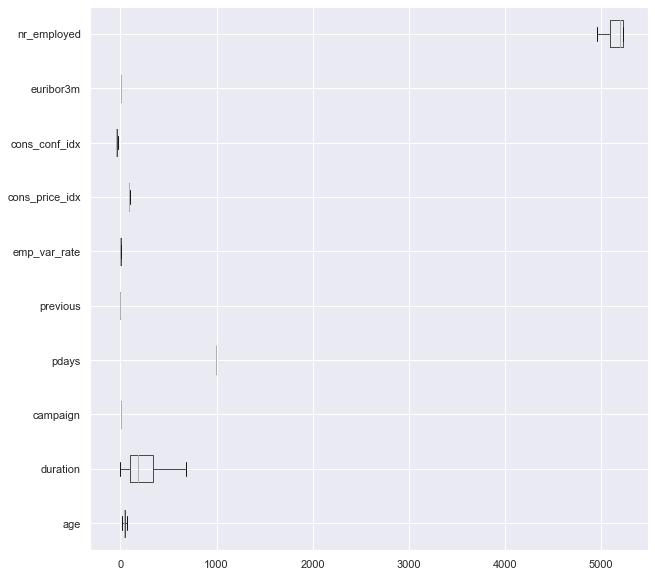

In [1297]:
plt.figure(figsize=(10,10))
train[num_cols].boxplot(vert=0)

In [1298]:
# Importing LabelEncoder and initializing it
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Iterating over all the common columns in train and test
for col in test.columns.values:
       # Encoding only categorical variables
       if test[col].dtypes=='object':
       # Using whole data to form an exhaustive list of levels
           data=train[col].append(test[col])
           le.fit(data.values)
           train[col]=le.transform(train[col])
           test[col]=le.transform(test[col])

In [1299]:
train.head()

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,FD
0,2008001,37.0,0,2,6,0,0,0,0,6,...,2.0,999.0,0.0,0,-1.8,92.893,-46.2,1.313,5099.1,0
1,2008002,50.0,0,1,2,0,0,0,0,1,...,3.0,999.0,0.0,1,1.4,93.444,-36.1,4.963,5228.1,0
2,2008003,45.0,9,0,5,0,0,0,0,1,...,1.0,999.0,0.0,1,1.4,93.444,-36.1,4.962,5228.1,0
3,2008004,27.0,9,2,5,0,0,0,0,0,...,1.0,999.0,0.0,1,-1.8,93.075,-47.1,1.415,5099.1,0
4,2008005,22.0,9,2,5,0,2,0,0,7,...,1.0,999.0,0.0,1,-3.4,92.649,-30.1,0.720,5017.5,1


In [1300]:
#train[num_cols] = train[num_cols].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [1301]:
scaler = StandardScaler()
train[num_cols] = scaler.fit_transform(train[num_cols])

In [1302]:
train.head()

,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,FD
0,2008001,-0.292476,0,2,6,0,0,0,0,6,...,-0.155150,0.0,0.0,0,-0.787719,-0.809836,-0.974189,-0.926893,-0.624896,0
1,2008002,0.921752,0,1,2,0,0,0,0,1,...,0.492918,0.0,0.0,1,1.158191,0.350838,0.994213,1.089678,1.023744,0
2,2008003,0.454741,9,0,5,0,0,0,0,1,...,-0.803218,0.0,0.0,1,1.158191,0.350838,0.994213,1.089125,1.023744,0
3,2008004,-1.226498,9,2,5,0,0,0,0,0,...,-0.803218,0.0,0.0,1,-0.787719,-0.426456,-1.149591,-0.870539,-0.624896,0
4,2008005,-1.693509,9,2,5,0,2,0,0,7,...,-0.803218,0.0,0.0,1,-1.760674,-1.323819,2.163561,-1.254517,-1.667757,1


In [1303]:
dependent_variable = 'FD'
independent_variable = [x for x in train.columns if x not in ['ID', dependent_variable]]

print(independent_variable)

# Inititate the algorithm
model_01 = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2,random_state=1)

# Fit the algorithm
model_01.fit(train[independent_variable], train[dependent_variable])

# Model predictions
model_01_predictions = model_01.predict(test[independent_variable])


['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.2s finished


In [1310]:
# Make submission
submission = pd.read_csv('Sample_Submission.csv')
submission.ID = test.ID

In [1339]:
fd = [0]*len(test['ID'])


In [1368]:
for i in range(len(model_01_predictions)):
    if model_01_predictions[i] == 1: 
        fd[i] = [1]   

In [1389]:
submission['FD'] = fd


In [1334]:
submission.to_csv('submi2.csv', index = False)

In [ ]:
#model-2

In [1335]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [1370]:
dependent_variable = 'FD'
independent_variable = [x for x in train.columns if x not in ['ID', dependent_variable]]

print(independent_variable)

# Inititate the algorithm
model_02 = xgb.XGBClassifier(random_state=1,learning_rate=0.01)

# Fit the algorithm
model_02.fit(train[independent_variable], train[dependent_variable])

# Model predictions
model_02_predictions = model_02.predict(test[independent_variable])
model_02

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [1371]:
probs = model_02.predict_proba(train[independent_variable])
probs = probs[:, 1]
print(roc_auc_score(train[dependent_variable], probs))

0.9383229934473634


In [1372]:
# Make submission
submission= pd.read_csv('Sample_Submission.csv')
submission.ID = test.ID


In [1373]:
fd = [0]*len(test['ID'])


In [1377]:
for i in range(len(model_02_predictions)):
    if model_02_predictions[i] == 1: 
        fd[i] = 1   

In [1378]:
submission['FD'] = fd

In [1380]:
submission.to_csv('submi4_new1.csv', index = False)

In [ ]:
# Adaboost

In [1356]:
from sklearn.ensemble import AdaBoostClassifier

In [1385]:
dependent_variable = 'FD'
independent_variable = [x for x in train.columns if x not in ['ID', dependent_variable]]

# Inititate the algorithm
model_03 = AdaBoostClassifier(n_estimators=160, learning_rate= 0.5)

# Fit the algorithm
model_03.fit(train[independent_variable], train[dependent_variable])

# Model predictions
model_03_predictions = model_03.predict(test[independent_variable])

# Make submission
submission = pd.read_csv('Sample_Submission.csv')
submission.ID = test.ID
fd = [0]*len(test['ID'])
for i in range(len(model_03_predictions)):
    if model_03_predictions[i] == 1: 
        fd[i] = 0        
submission['FD'] = fd
submission.to_csv('submission_07.csv', index = False)

In [1386]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [1388]:
dependent_variable8 = 'FD'
independent_variable8 = [x for x in train.columns if x not in ['ID', dependent_variable8]]

# Inititate the algorithm
model_05 = xgb.XGBClassifier(random_state=1,learning_rate=0.01)

# Fit the algorithm
model_05.fit(train[independent_variable8], train[dependent_variable8])

# Model predictions
model_05_predictions = model_05.predict(test[independent_variable8])

# Make submission
submission8 = pd.read_csv('Sample_Submission.csv')
submission8.ID = test.ID
fd8 = [0]*len(test['ID'])
for i in range(len(model_05_predictions)):
    if model_05_predictions[i] == 1: 
        fd8[i] = 0        
submission['FD'] = fd8
submission.to_csv('submission_09.csv', index = False)

In [1391]:
from sklearn import svm
#SVM_model= svm.SVC(random_state=1,probability=True)

In [1392]:
dependent_variable9 = 'FD'
independent_variable9 = [x for x in train.columns if x not in ['ID', dependent_variable9]]

# Inititate the algorithm
model_06 = svm.SVC(random_state=1,probability=True)

# Fit the algorithm
model_06.fit(train[independent_variable9], train[dependent_variable9])

# Model predictions
model_06_predictions = model_06.predict(test[independent_variable9])

# Make submission
submission9 = pd.read_csv('Sample_Submission.csv')
submission9.ID = test.ID
fd9 = [0]*len(test['ID'])
for i in range(len(model_06_predictions)):
    if model_06_predictions[i] == 1: 
        fd9[i] = 0        
submission['FD'] = fd9
submission.to_csv('submission_10.csv', index = False)

In [1393]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
#Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)

In [1394]:
dependent_variable10 = 'FD'
independent_variable10 = [x for x in train.columns if x not in ['ID', dependent_variable10]]

# Inititate the algorithm
model_07 = BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)

# Fit the algorithm
model_07.fit(train[independent_variable10], train[dependent_variable10])

# Model predictions
model_07_predictions = model_07.predict(test[independent_variable10])

# Make submission
submission10 = pd.read_csv('Sample_Submission.csv')
submission10.ID = test.ID
fd10 = [0]*len(test['ID'])
for i in range(len(model_07_predictions)):
    if model_07_predictions[i] == 1: 
        fd10[i] = 0        
submission['FD'] = fd10
submission.to_csv('submission_11.csv', index = False)

In [1395]:
probs = model_07.predict_proba(train[independent_variable])
probs = probs[:, 1]
print(roc_auc_score(train[dependent_variable], probs))

0.999488948164708


In [ ]:
submission = pd.DataFrame({ 'ID': test.ID.values, 'FD': probs })
submission.to_csv("sub1.csv", index=False)